# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 50)
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Мы получили данные из объявлений по продаже недвижимости Санкт-Петербурга. Изначально у нас 23699 строк и 22 столбца. В первых выведенных строках видим, что где-то данные отсутствуют или заполнены нулевые значения. Перед анализом потребуется предобработка данных.

## Предобработка данных

In [3]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Избавимя вначале от пропусков.
Пропуски по высоте потолков меняем на медианное значение.
Пропуски по этажности домов -  на медианное значение.
Жилая площадь - на медианное значение
Апартаменты - если нет значения, значит это не аппартаменты. Добавим булевое значение False.
Площадь кухни - среднее значение.
Балкон - если значение пропущено, значит нет балкона. Подставим 0.
Пропуски по населенному пункту - удаляем.
Удаленность от аэропорта, парков и центра - по максимальному значению берем, чтобы было мин значение на цену.
Дни экспозиции - пропуски меняем на 0.

In [4]:
df['ceiling_height'] = df['ceiling_height'].fillna(value=df['ceiling_height'].median())

In [5]:
df.dropna(subset=['floors_total'],inplace=True)

In [6]:
df[df.floor > df['floors_total']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [7]:
df.loc[df['studio'] == 1, 'kitchen_area'] = 0
kitchen_area_median=df.groupby('locality_name')['kitchen_area'].median()
for locality_name in kitchen_area_median.index:
    df.loc[(df['kitchen_area'].isna()) & (df['locality_name'] == locality_name), 'kitchen_area'] = kitchen_area_median.loc[locality_name]

In [8]:
len(df[df['kitchen_area'].isna()])

27

In [9]:
df=df.dropna(subset=['kitchen_area'])

In [10]:
living_area_median = df.groupby('rooms')['living_area'].median()
for rooms_number in living_area_median.index:
    df.loc[(df['rooms'] == rooms_number), 'living_area'] = df.loc[(df['rooms'] == rooms_number),'living_area'].fillna(living_area_median[rooms_number])

In [11]:
df['is_apartment'] = df['is_apartment'].fillna(value=False)

In [12]:
df['balcony'] = df['balcony'].fillna(value=0)

In [13]:
df.dropna(subset=['locality_name'],inplace=True)

In [14]:
df['airports_nearest'] = df['airports_nearest'].fillna(value=df['airports_nearest'].max())

In [15]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(value=df['cityCenters_nearest'].max())

In [16]:
df['parks_around3000'] = df['parks_around3000'].fillna(value=df['parks_around3000'].max())

In [17]:
df['parks_nearest'] = df['parks_nearest'].fillna(value=df['parks_nearest'].max())

In [18]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=df['ponds_around3000'].max())

In [19]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(value=df['ponds_nearest'].max())

In [20]:
df['days_exposition'] = df['days_exposition'].fillna(value=df['days_exposition'].median())

In [21]:
df = df.drop_duplicates().reset_index(drop=True)
print (df.duplicated().sum())

0


In [22]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

С пропусками разобрались. Теперь необходимо поменять тип даннх на целочисленный у следующих значений - итоговая цена, этажность домов, балконы, удаленность от центра, аэропортов, парков и водоемов. У этих значений отброшенная дробная часть не повлияет на результат исследования.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 22 columns):
total_images            23547 non-null int64
last_price              23547 non-null float64
total_area              23547 non-null float64
first_day_exposition    23547 non-null object
rooms                   23547 non-null int64
ceiling_height          23547 non-null float64
floors_total            23547 non-null float64
living_area             23547 non-null float64
floor                   23547 non-null int64
is_apartment            23547 non-null bool
studio                  23547 non-null bool
open_plan               23547 non-null bool
kitchen_area            23547 non-null float64
balcony                 23547 non-null float64
locality_name           23547 non-null object
airports_nearest        23547 non-null float64
cityCenters_nearest     23547 non-null float64
parks_around3000        23547 non-null float64
parks_nearest           23547 non-null float64
ponds_around300

In [24]:
df['last_price'] = df['last_price'].astype('int')

In [25]:
df['floors_total'] = df['floors_total'].astype('int')

In [26]:
df['balcony'] = df['balcony'].astype('int')

In [27]:
df['airports_nearest'] = df['airports_nearest'].astype('int')

In [28]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')

In [29]:
df['parks_around3000'] = df['parks_around3000'].astype('int')

In [30]:
df['parks_nearest'] = df['parks_nearest'].astype('int')

In [31]:
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

In [32]:
df['ponds_nearest'] = df['ponds_nearest'].astype('int')

In [33]:
df['days_exposition'] = df['days_exposition'].astype('int')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 22 columns):
total_images            23547 non-null int64
last_price              23547 non-null int64
total_area              23547 non-null float64
first_day_exposition    23547 non-null object
rooms                   23547 non-null int64
ceiling_height          23547 non-null float64
floors_total            23547 non-null int64
living_area             23547 non-null float64
floor                   23547 non-null int64
is_apartment            23547 non-null bool
studio                  23547 non-null bool
open_plan               23547 non-null bool
kitchen_area            23547 non-null float64
balcony                 23547 non-null int64
locality_name           23547 non-null object
airports_nearest        23547 non-null int64
cityCenters_nearest     23547 non-null int64
parks_around3000        23547 non-null int64
parks_nearest           23547 non-null int64
ponds_around3000        23547

Поменяли на целочисленные типы данных в показателях конечной цены, этажности дома, количества балконов, удаленности от центра, аэропортов, парков, прудов. Дробные значения в этих показателях можно упустить, они не повляют на наше исследование.

## Расчёты и добавление результатов в таблицу

In [35]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']
df['price_per_square_meter'] = df['price_per_square_meter'].astype('int')

In [36]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [37]:
df['weekday'] = df['first_day_exposition'].dt.weekday

In [38]:
df['month'] = df['first_day_exposition'].dt.month

In [39]:
df['year'] = df['first_day_exposition'].dt.year

In [40]:
def floor(row):
    if row['floor'] == 1:
        return "первый"
    elif row['floor'] == row['floors_total']:
        return "последний"
    else:
        return "другой"

df['floor_type'] = df[['floor', 'floors_total']].apply(floor, axis=1)

In [41]:
df['ratio_living_area'] = df['living_area'] / df['total_area']

In [42]:
df['ratio_living_area'] = df['ratio_living_area'].round(2)

In [43]:
df['ratio_kitchen_area'] = df['kitchen_area'] / df['total_area']
df['ratio_kitchen_area'] = df['ratio_kitchen_area'].round(2)

In [44]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_type,ratio_living_area,ratio_kitchen_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,95,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817,18603,0,3190,0,1344,81,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.00,9,False,False,False,9.80,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176,4,7,2015,другой,0.28,0.06
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,84869,65968,3,3190,3,1344,55,95065,0,9,2018,другой,0.47,0.30
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996,19143,0,3190,0,1344,155,99195,3,11,2017,другой,0.28,0.39
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982,11634,0,3190,0,1344,95,110544,3,4,2019,другой,0.43,0.26
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,84869,65968,3,3190,3,1344,189,87454,2,5,2018,другой,0.47,0.27
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898,15008,0,3190,0,1344,289,88524,6,2,2017,другой,0.71,0.11


Добавили столбцы с расчетами - цена за кв.м, день недели, месяц и год размещения объявления. Посчитали соотношение жилой и общей площади, а также отношение площади кухни к общей.
И в зависомости от этажности квартиры прописали ее этаж - первый, последний или другой.

## Исследовательский анализ данных

### Исследование цены

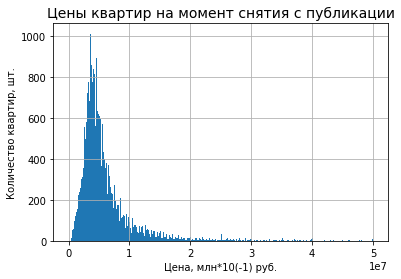

In [45]:
df['last_price'].hist(bins=300,range=(0,50000000))
plt.title('Цены квартир на момент снятия с публикации', size=14)
plt.xlabel('Цена, млн*10(-1) руб.')
plt.ylabel('Количество квартир, шт.')
plt.show()


Большинство продаж квартир проведено по цене 3-4 млн.руб.

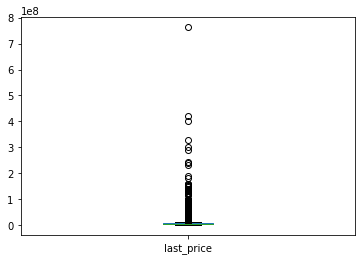

In [46]:
df.plot(kind='box', y='last_price')

plt.show()

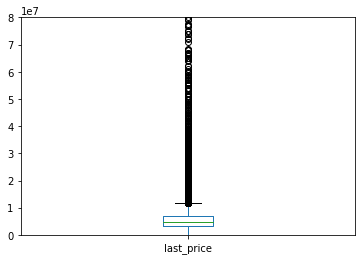

In [47]:
df.plot(kind='box', y='last_price', ylim=(0, 80000000))

plt.show()

In [48]:
df['last_price'].describe()

count    2.354700e+04
mean     6.543206e+06
std      1.091432e+07
min      1.219000e+04
25%      3.410500e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

По диаграмме размаха в выбросы попадают квартиры дороже 11 млн.руб. Таких дорогих квартир в выборке много. Уберем квартиры дороже 25 млн.руб. Уберем также и очень дешевые квартиры, дешевле 0,5 млн.руб.

In [49]:
good_df = df.query('last_price>500000')
good_df = good_df.query('last_price<25000000')

### Исследование площади

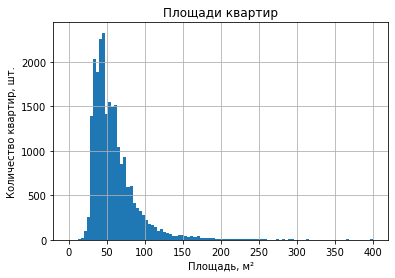

In [50]:
df['total_area'].hist(bins=100,range=(0,400))
plt.title('Площади квартир')
plt.xlabel('Площадь, м²')
plt.ylabel('Количество квартир, шт.')
plt.show()

In [51]:
df['total_area'].describe()

count    23547.000000
mean        60.323866
std         35.650209
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Квартиры, площадью 40-49 кв.м. продаются чаще чем остальные. Квартиры, площадью меньше 20 кв.м встречаются редко, как и очень большие, площадью свыше 250 кв.м.

In [52]:
good_df = good_df.query('total_area>19')
good_df = good_df.query('total_area<250')


### Исследование количества комнат

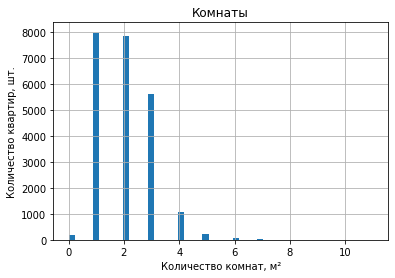

In [53]:
good_df['rooms'].hist(bins=50)
plt.title('Комнаты')
plt.xlabel('Количество комнат, м²')
plt.ylabel('Количество квартир, шт.')
plt.show()

Больше продается 1 и 2-х комнатных квартир. Странно выглядят данные по квартирам с 0 комнатами, удалим их. Квартир с 8 и больше комнат встречается крайне редко. Будем считать это выбросами.

In [54]:
good_df = good_df.query('rooms<8')

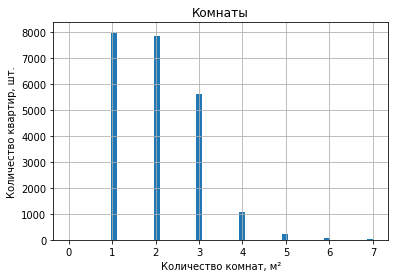

In [55]:
good_df.drop(good_df[good_df['rooms'] < 1 ].index, inplace=True)
good_df['rooms'].hist(bins=50,range=(0,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат, м²')
plt.ylabel('Количество квартир, шт.')
plt.show()

### Исследование высоты потолков

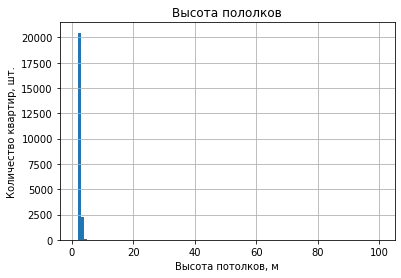

In [56]:
good_df['ceiling_height'].hist(bins=100)
plt.title('Высота пололков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир, шт.')
plt.show()

In [57]:
good_df['ceiling_height'].describe()

count    22800.000000
mean         2.716061
std          0.990343
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Самая распостраненная высота полотков в продаваемых квартирах 2,6 м. В данных есть квартиры с потолками в 1 м и 100м. Это явные ошибки. Убираем квартиры с потолками меньше 2 м и 5м.

In [58]:
good_df = good_df.query('ceiling_height<5')
good_df = good_df.query('ceiling_height>=2')

### Исследование количества дней размещения объявлений

In [59]:
good_df['days_exposition'].describe()

count    22767.000000
mean       167.895287
std        204.380965
min          1.000000
25%         45.000000
50%         95.000000
75%        196.000000
max       1580.000000
Name: days_exposition, dtype: float64

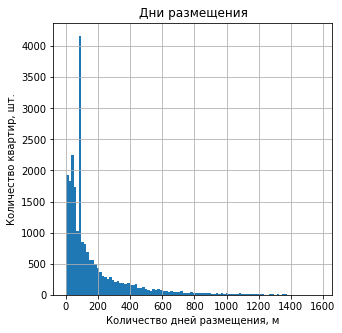

In [60]:
good_df['days_exposition'].hist(figsize=(5,5), bins=100)
plt.title('Дни размещения')
plt.xlabel('Количество дней размещения, м')
plt.ylabel('Количество квартир, шт.')
plt.show()

Большинство квартир продается за 90-100 дней. Продажи на отметке от 800 дней уже редки. Чтобы изучить подробнее информацию по срокам продаж построим диаграмму с выбросами.

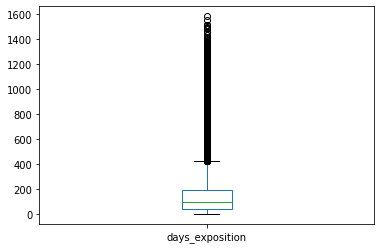

In [61]:
good_df.plot(kind='box', y='days_exposition')

plt.show()

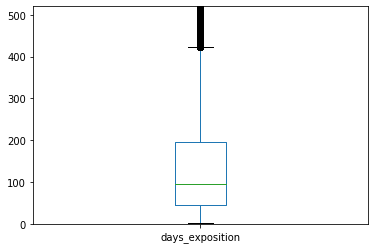

In [62]:
good_df.plot(kind='box', y='days_exposition', ylim=(0, 520))

plt.show()

In [63]:
good_df = good_df.query('days_exposition<430')
good_df = good_df.query('days_exposition>2')

In [64]:

good_df[['last_price', 'total_area','rooms', 'ceiling_height' ]].describe().loc[['min', 'max']]

,last_price,total_area,rooms,ceiling_height
min,520000.0,20.0,1.0,2.0
max,24900000.0,248.0,7.0,4.8


### Зависимость цены от площади квартиры

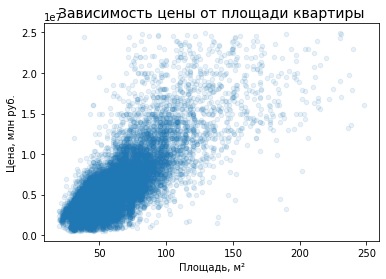

In [65]:
good_df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)
plt.title('Зависимость цены от площади квартиры', size=14)
plt.xlabel('Площадь, м²')
plt.ylabel('Цена, млн руб.')
plt.show()

In [66]:
good_df['last_price'].corr(good_df['total_area'])

0.7811327330730891

Стоимость квартир сильно зависит от площади. Коэффициент корреляции высокий - 0,78. Наибольшее количество квартир площадью от 40 до 70 кв.м. по цене 4,5-7млн.руб.

### Зависимость цены от числа комнат

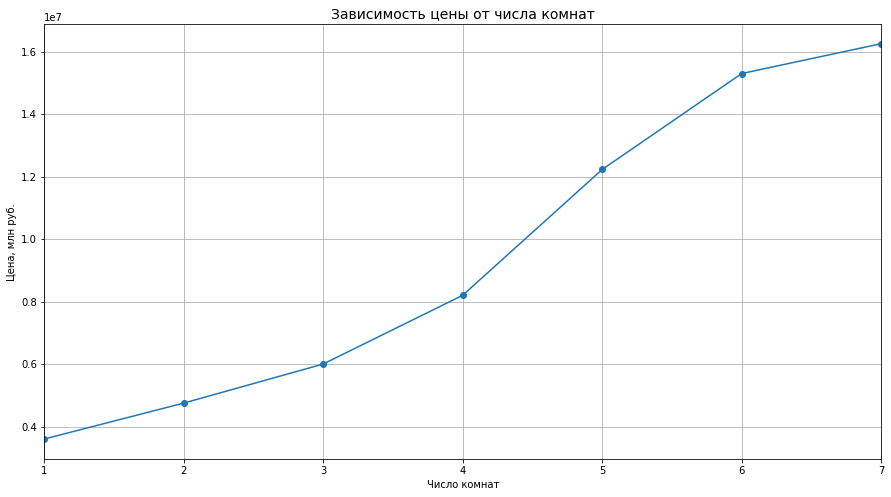

In [67]:
(good_df
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),alpha=1)
)
plt.title('Зависимость цены от числа комнат', size=14)
plt.xlabel('Число комнат')
plt.ylabel('Цена, млн руб.')
plt.show()

In [68]:
good_df['last_price'].corr(good_df['rooms'])

0.5035778165526313

По графику видно, что цена квартиры увеличивается с увеличением количества комнат. Квартиры с 7 комнатами стоят дешевле 5-ти комнатных. Здесь необходимо дополнительно оценивать общую площадь квартир.


### Зависимость цены от этажа, на котором находится квартира

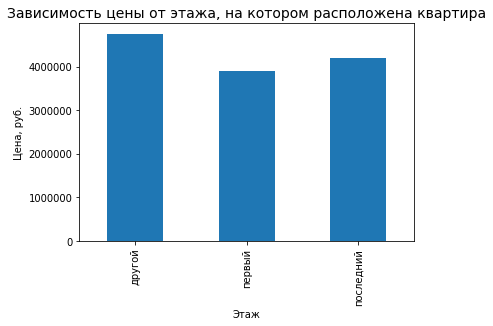

In [69]:
(good_df
     .groupby('floor_type')['last_price'].median()
     .plot(x='floor_type',y='last_price',kind='bar')
)
plt.title('Зависимость цены от этажа, на котором расположена квартира', size=14)
plt.xlabel('Этаж')
plt.ylabel('Цена, руб.')
plt.show()

In [70]:
good_df['floor'].corr(good_df['last_price'])

0.08860703556755462

Из гистограммы видим, что квартиры, расположенные на 1 этаже, несколько дешевле остальных. Коэффициент корреляции невысокий, т.е. это не будет определяющим фактором.

### Зависимость цены от удаленности от центра

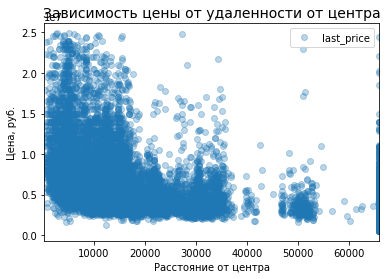

In [71]:
(good_df
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)
plt.title('Зависимость цены от удаленности от центра', size=14)
plt.xlabel('Расстояние от центра')
plt.ylabel('Цена, руб.')
plt.show()

In [72]:
good_df['cityCenters_nearest'].corr(good_df['last_price'])

-0.4694205328407518

По графику плотностей разброс большой. Видим зависимость, при которой при удалении от центра цена снижается.

### Зависимость цены от даты размещения

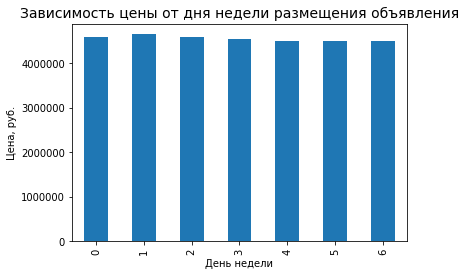

In [73]:
(good_df
     .groupby('weekday')['last_price'].median()
     .plot(x='weekday',y='last_price',kind='bar')
)
plt.title('Зависимость цены от дня недели размещения объявления', size=14)
plt.xlabel('День недели')
plt.ylabel('Цена, руб.')
plt.show()

Гистограмма показывает, что цена квартир, объявления по которым публиковались во вторник несколько выше, чем в остальные дни.

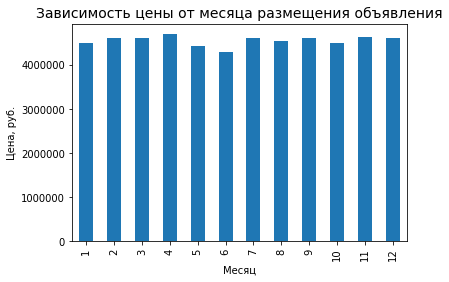

In [74]:
(good_df
     .groupby('month')['last_price'].median()
     .plot(x='month',y='last_price',kind='bar')
)
plt.title('Зависимость цены от месяца размещения объявления', size=14)
plt.xlabel('Месяц')
plt.ylabel('Цена, руб.')
plt.show()

Цены на квартиры самые низкие были в мае и июне, а самыми высокими в апреле.

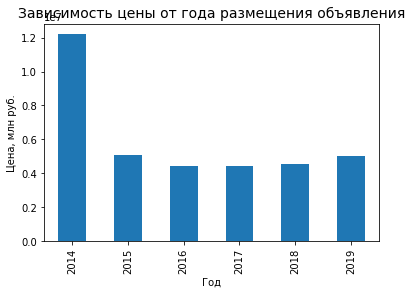

In [75]:
(good_df
     .groupby('year')['last_price'].median()
     .plot(x='year',y='last_price',kind='bar')
)
plt.title('Зависимость цены от года размещения объявления', size=14)
plt.xlabel('Год')
plt.ylabel('Цена, млн руб.')
plt.show()

В 2015 году было резкое снижение цен на недвижимость по сравнению с 2014г. В 2019 г. цены немного повысились, но значений 2014г. так и не достигли.

### 10 населённых пунктов с наибольшим числом объявлений.

In [76]:
df_city_flat = good_df.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=('count','median'))
df_city_flat.sort_values(by='count',ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,13503.0,103921.0
посёлок Мурино,453.0,84388.0
посёлок Шушары,402.0,76747.5
Всеволожск,350.0,65789.0
Пушкин,328.0,99725.0
Колпино,315.0,74375.0
посёлок Парголово,299.0,91346.0
Гатчина,274.0,67745.5
деревня Кудрово,248.0,91666.0


In [77]:
import warnings

warnings.filterwarnings('ignore')

В Санкт-Петербурге больше всего объявлений и самая высокая стоимость квадратного метра недвижимости. Всех меньше объявлений в ТОП10 - в Выборге. Недвижимость там также самай дешевая по нашей выборке.

In [78]:
good_df['cityCenters_nearest_in_km'] = good_df['cityCenters_nearest']/1000


In [79]:

good_df['cost_of_km']=good_df['last_price']/good_df['cityCenters_nearest_in_km']

In [80]:
good_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_type,ratio_living_area,ratio_kitchen_area,cityCenters_nearest_in_km,cost_of_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,95,120370,3,3,2019,другой,0.47,0.23,16.028,8.110806e+05
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817,18603,0,3190,0,1344,81,82920,1,12,2018,первый,0.46,0.27,18.603,1.800785e+05
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,другой,0.32,0.41,8.098,1.234873e+06
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,84869,65968,3,3190,3,1344,55,95065,0,9,2018,другой,0.47,0.30,65.968,4.380912e+04
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,False,False,14.4,1,посёлок Парголово,52996,19143,0,3190,0,1344,155,99195,3,11,2017,другой,0.28,0.39,19.143,1.932821e+05


In [81]:
spb_region=good_df.query('locality_name=="Санкт-Петербург"')
spb_region.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_type,ratio_living_area,ratio_kitchen_area,cityCenters_nearest_in_km,cost_of_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,95,120370,3,3,2019,другой,0.47,0.23,16.028,8.110806e+05
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,другой,0.32,0.41,8.098,1.234873e+06
7,5,7915000,71.6,2019-04-18,2,2.65,24,30.5,22,False,False,False,18.9,2,Санкт-Петербург,23982,11634,0,3190,0,1344,95,110544,3,4,2019,другой,0.43,0.26,11.634,6.803335e+05
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898,15008,0,3190,0,1344,289,88524,6,2,2017,другой,0.71,0.11,15.008,3.598081e+05
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357,13878,1,310,2,553,137,127525,3,11,2017,другой,0.51,0.21,13.878,3.638853e+05


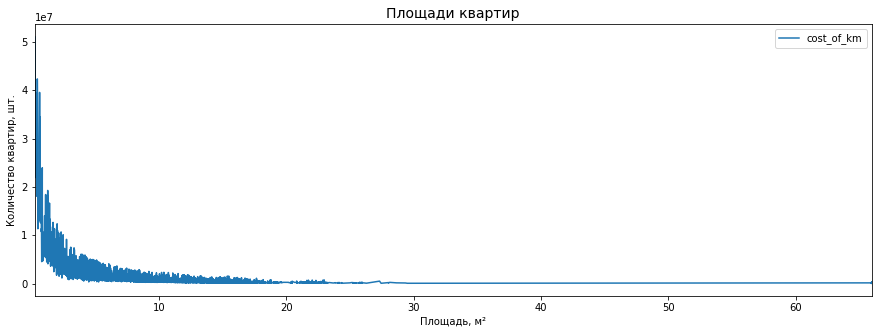

In [82]:
(spb_region
    .sort_values(by='cityCenters_nearest_in_km',ascending=True)
    .plot(x='cityCenters_nearest_in_km',y='cost_of_km', style='-',figsize=(15,5))
)


plt.title('Площади квартир', size=14)
plt.xlabel('Площадь, м²')
plt.ylabel('Количество квартир, шт.')
plt.show()

Центральный район Санкт-петербурга ограничим радиусом в 3 км. 

In [83]:
spb_region=spb_region.query('cityCenters_nearest_in_km<3')

In [84]:
len(spb_region)

441

Квартиры в центре

In [85]:
spb_region.sort_values(by='cost_of_km',ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_type,ratio_living_area,ratio_kitchen_area,cityCenters_nearest_in_km,cost_of_km
8565,7,10990000,100.0,2015-12-16,3,3.90,5,37.8,3,False,False,False,11.6,0,Санкт-Петербург,21818,215,3,229,2,511,265,109900,2,12,2015,другой,0.38,0.12,0.215,5.111628e+07
12478,3,17900000,162.2,2017-10-16,5,3.60,5,101.0,3,False,False,False,21.1,0,Санкт-Петербург,21857,423,3,388,2,516,380,110357,0,10,2017,другой,0.62,0.13,0.423,4.231678e+07
3885,20,23800000,136.0,2015-01-21,2,3.45,4,72.0,4,False,False,False,42.0,0,Санкт-Петербург,21300,602,3,539,3,38,95,175000,2,1,2015,последний,0.53,0.31,0.602,3.953488e+07
20741,18,11500000,113.5,2018-09-17,3,4.20,7,44.2,6,False,False,False,21.7,1,Санкт-Петербург,21739,291,2,472,2,94,95,101321,0,9,2018,другой,0.39,0.19,0.291,3.951890e+07
8628,15,13500000,98.0,2017-12-19,3,3.50,5,46.0,3,False,False,False,22.0,0,Санкт-Петербург,21369,376,3,541,3,222,35,137755,1,12,2017,другой,0.47,0.22,0.376,3.590426e+07


In [86]:
top_spb=good_df.query('cityCenters_nearest_in_km<3 and locality_name=="Санкт-Петербург"')
top_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_type,ratio_living_area,ratio_kitchen_area,cityCenters_nearest_in_km,cost_of_km
24,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,False,False,False,19.6,0,Санкт-Петербург,20052,2336,3,411,3,124,265,66872,5,10,2015,первый,0.48,0.20,2.336,2.782534e+06
99,32,9600000,90.0,2017-09-26,4,2.65,5,67.0,2,False,False,False,8.0,0,Санкт-Петербург,23277,2818,0,3190,0,1344,104,106666,1,9,2017,другой,0.74,0.09,2.818,3.406671e+06
138,8,4800000,40.0,2017-11-18,2,2.65,3,29.0,2,False,False,False,6.0,0,Санкт-Петербург,23371,2913,0,3190,2,729,80,120000,5,11,2017,другой,0.72,0.15,2.913,1.647786e+06
179,5,14800000,108.7,2019-04-11,3,4.00,5,72.4,5,False,False,False,8.0,0,Санкт-Петербург,23017,2559,1,559,0,1344,95,136154,3,4,2019,последний,0.67,0.07,2.559,5.783509e+06
206,11,9000000,72.6,2018-09-08,2,2.90,5,43.2,4,False,False,False,11.4,0,Санкт-Петербург,22794,1645,2,276,3,485,95,123966,5,9,2018,другой,0.60,0.16,1.645,5.471125e+06


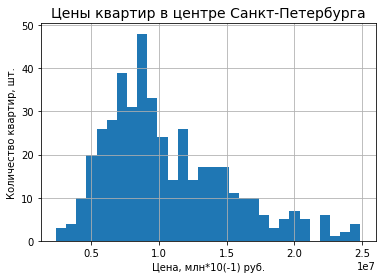

In [87]:
top_spb['last_price'].hist(bins=30)
plt.title('Цены квартир в центре Санкт-Петербурга', size=14)
plt.xlabel('Цена, млн*10(-1) руб.')
plt.ylabel('Количество квартир, шт.')
plt.show()

В центре квартиры стоят в основном около 7 млн.

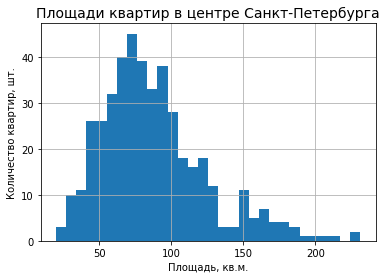

In [88]:
top_spb['total_area'].hist(bins=30)
plt.title('Площади квартир в центре Санкт-Петербурга', size=14)
plt.xlabel('Площадь, кв.м.')
plt.ylabel('Количество квартир, шт.')
plt.show()

В центре в основном квартиры площадью около 60 кв.м.

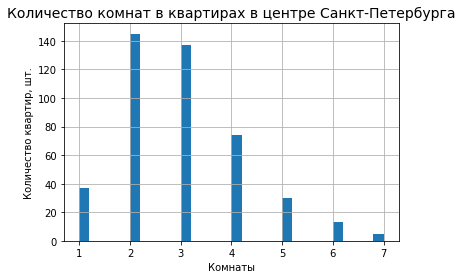

In [89]:
top_spb['rooms'].hist(bins=30)
plt.title('Количество комнат в квартирах в центре Санкт-Петербурга', size=14)
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир, шт.')
plt.show()

Чаще это 2-х комнатные.

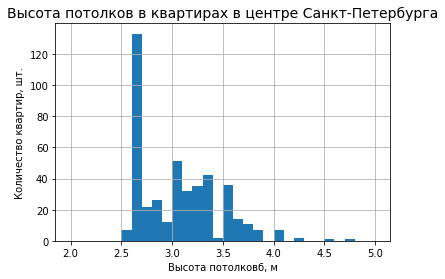

In [90]:
top_spb['ceiling_height'].hist(bins=30,range=(2,5))
plt.title('Высота потолков в квартирах в центре Санкт-Петербурга', size=14)
plt.xlabel('Высота потолковб, м')
plt.ylabel('Количество квартир, шт.')
plt.show()

С высотой потолков 2,6м

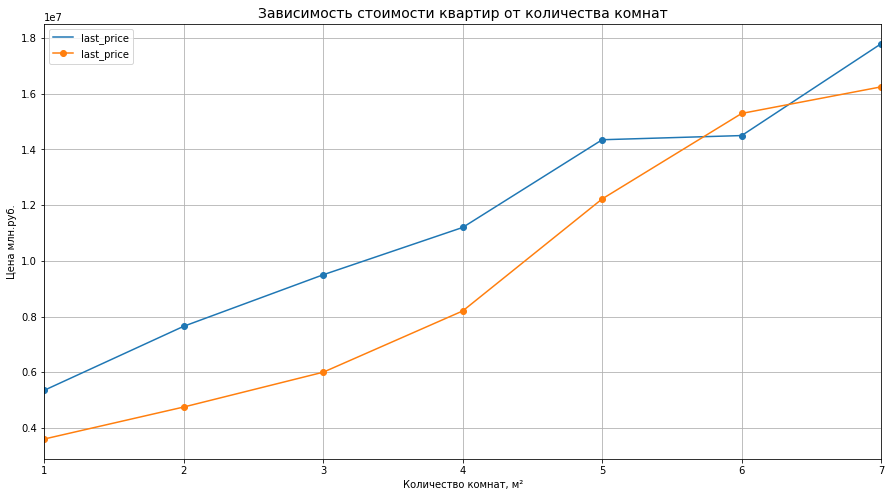

In [91]:
(top_spb
     .sort_values(by='last_price',ascending=True)
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True)
)


(good_df
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True)
)


plt.title('Зависимость стоимости квартир от количества комнат', size=14)
plt.xlabel('Количество комнат, м²')
plt.ylabel('Цена млн.руб.')

plt.show()


Квартиры в центре дороже, это видно по их графику - он выше, чем по остальным квартирам. Самые дорогие 5 комнатные.

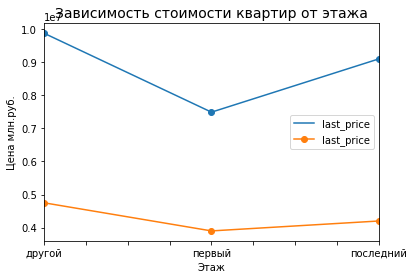

In [92]:

(top_spb
    .groupby('floor_type')['last_price'].median()
    .plot(x='floor_type',y='last_price',style='o-',legend=True)
)


(good_df
    .groupby('floor_type')['last_price'].median()
    .plot(x='floor_type',y='last_price',style='o-',legend=True)
)


plt.title('Зависимость стоимости квартир от этажа', size=14)
plt.xlabel('Этаж')
plt.ylabel('Цена млн.руб.')
plt.show()

В центре более заметна разница в цене квартир на первом этаже. Они значительно дешевле, чем остальные. На цену квартир из центра не влияет, находится она на последнем этаже или нет. 

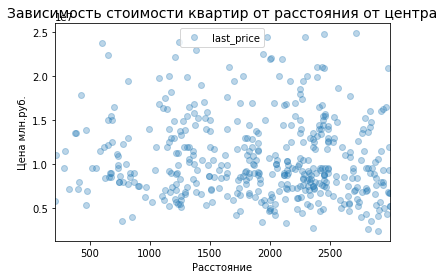

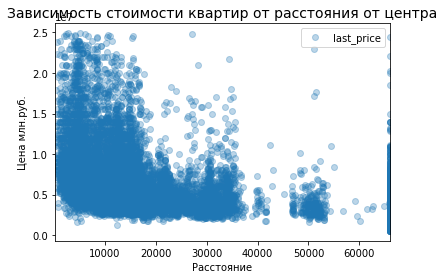

In [93]:
(top_spb
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)


plt.title('Зависимость стоимости квартир от расстояния от центра', size=14)
plt.xlabel('Расстояние')
plt.ylabel('Цена млн.руб.')

(good_df
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)


plt.title('Зависимость стоимости квартир от расстояния от центра', size=14)
plt.xlabel('Расстояние')
plt.ylabel('Цена млн.руб.')

plt.show()

Больше всего квартир на расстоянии 4-5 км  и стоят они 5-8 млн.руб

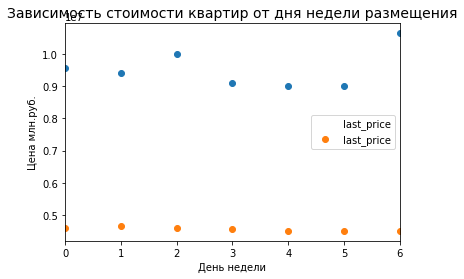

In [94]:
(top_spb
     .groupby('weekday')['last_price'].median()
     .plot(x='weekday',y='last_price',style='o',legend=True)
)

(good_df
     .groupby('weekday')['last_price'].median()
     .plot(x='weekday',y='last_price',style='o',legend=True)
)

plt.title('Зависимость стоимости квартир от дня недели размещения', size=14)
plt.xlabel('День недели')
plt.ylabel('Цена млн.руб.')
plt.show()

Размещение по дням примерно одинаковое.

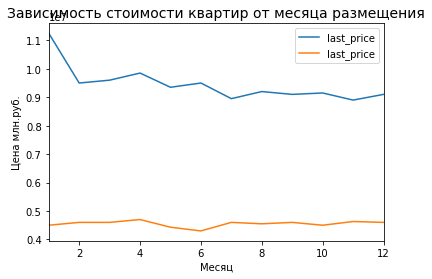

In [95]:
(top_spb
     .groupby('month')['last_price'].median()
     .plot(x='month',y='last_price',style='-',legend=True)
)
(good_df
     .groupby('month')['last_price'].median()
     .plot(x='month',y='last_price',style='-',legend=True)
)
plt.title('Зависимость стоимости квартир от месяца размещения', size=14)
plt.xlabel('Месяц')
plt.ylabel('Цена млн.руб.')
plt.show()

В центре в январе были самыми высокими, в феврале было резкое снижение. В апреле цены немного отросли, но потом также продолжилось снижение.

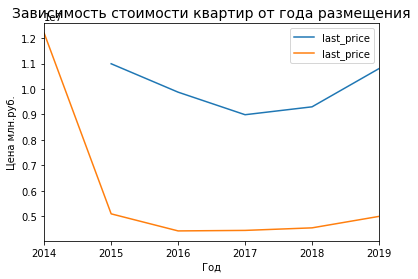

In [96]:
(top_spb
     .groupby('year')['last_price'].median()
     .plot(x='year',y='last_price',style='-',legend=True)
)
(good_df
     .groupby('year')['last_price'].median()
     .plot(x='year',y='last_price',style='-',legend=True)
)
plt.title('Зависимость стоимости квартир от года размещения', size=14)
plt.xlabel('Год')
plt.ylabel('Цена млн.руб.')
plt.show()

В выборке отсутствует информация по объявлениям продаж квартир в центре в 2014 году. Снижение цен на квартиры в центре с 2015 по 2017 год более выраженное по сравнению с ценами по все районам.

## Общий вывод

Мы получили данные из объявлений по продаже недвижимости Санкт-Петербурга. Изначально у нас 23699 строк и 22 столбца. 
Убрали пропуски, заменили типы данных на нужные нам для анализа.
Провели расчеты и получили - цену за кв.м, день недели, месяц и год размещения объявления. Посчитали соотношение жилой и общей площади, а также отношение площади кухни к общей. И в зависомости от этажности квартиры прописали ее этаж - первый, последний или другой.
При анализе выяснили, что большинство продаж квартир проведено по цене 3-4 млн.руб. Такие квартиры были площадью 40-49 кв.м., имеют 1 или 2 комнаты, с высотой потолков 2,6 м. и находятся не на первом этаже.
Большинство квартир продается за 90-100 дней.
Стоимость квартир сильно зависит от площади и количества комнат.


В Санкт-Петербурге больше всего объявлений и самая высокая стоимость квадратного метра недвижимости. Всех меньше объявлений в ТОП10 - в Выборге. Недвижимость там также самай дешевая по нашей выборке.
Решили считать, что квартиры, находящиеся в 3 км от центра - будут находиться в выборке по центральному району.
В центре квартиры стоят в основном около 7 млн.
В центре в основном квартиры площадью около 60 кв.м.
Чаще это 2-х комнатные.
С высотой потолков 2,6м
Квартиры в центре дороже. Самые дорогие 5 комнатные. 
В центре более заметна разница в цене квартир на первом этаже. Они значительно дешевле, чем остальные. На цену квартир из центра не влияет, находится она на последнем этаже или нет.

Цены на квартиры как в центре Санкт-Петербурга, так и в целом по выборке зависят в первую очередь от общей площади, а также от жилой площади и площади кухни, в меньшей степени от количества комнат. Остальные факторы оказывают на ценообразование меньшее влияние.

